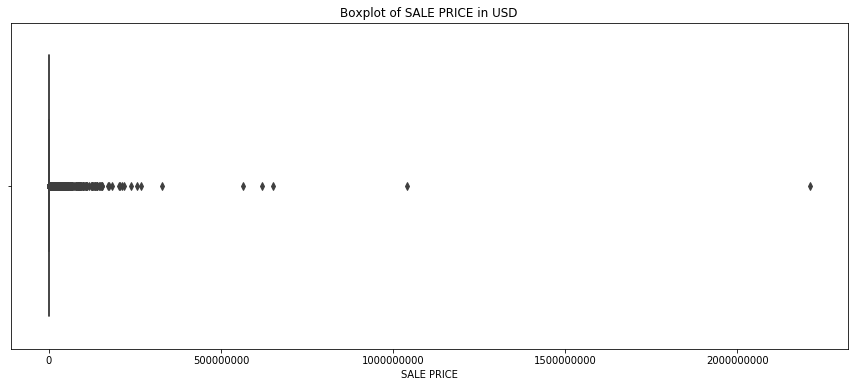

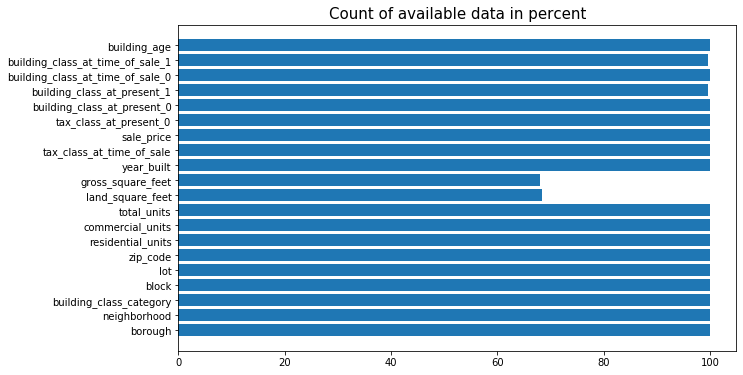

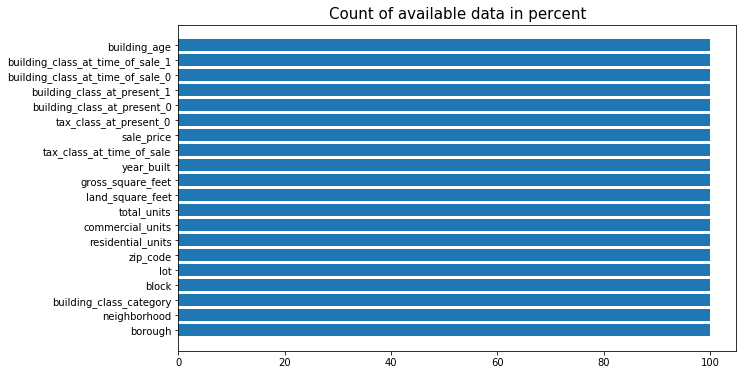

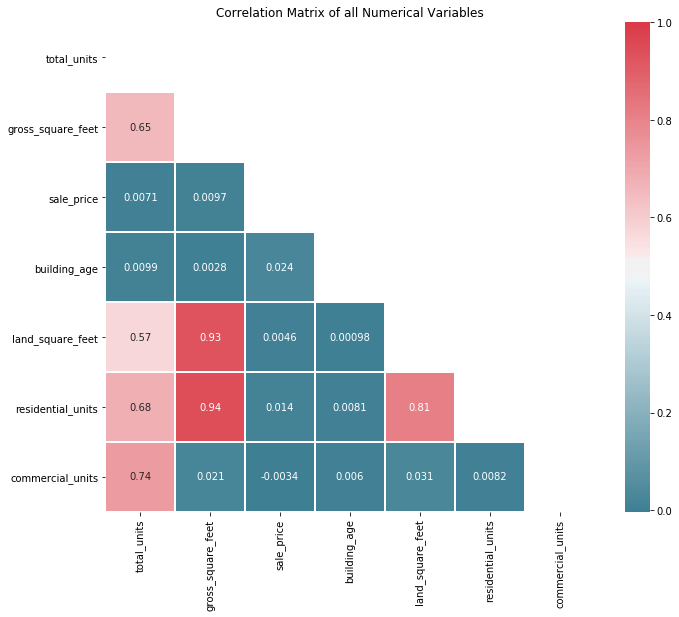

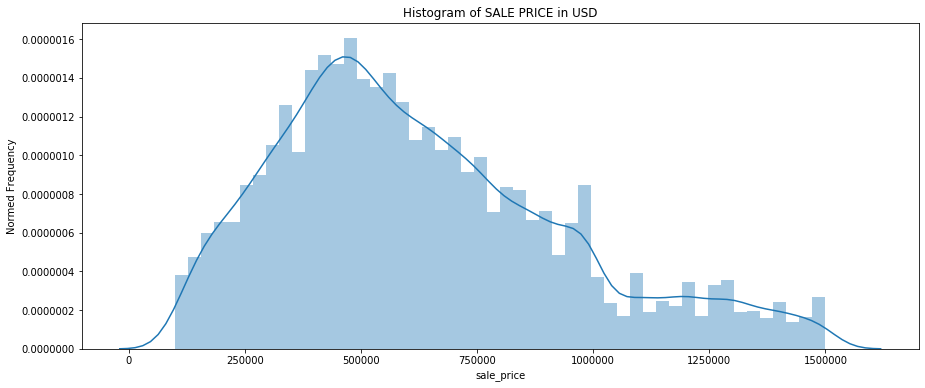

borough                 : 5 unique categorical values.
building_class_category : 33 unique categorical values.
38 columns will be added during one-hot encoding.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29812 entries, 223 to 84545
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   borough                  29812 non-null  int64
 1   building_class_category  29812 non-null  int64
dtypes: int64(2)
memory usage: 698.7 KB
Total sample size = 29812; training sample size = 23849, testing sample size = 5963
R^2: 0.12503217704829894
Root Mean Squared Error: 0.9423303820633274
Average 5-Fold CV Score: 0.11658172582366474
[0.11443706 0.09913357 0.12892924 0.11091627 0.12949249]
R^2: 0.3524637205153055
Root Mean Squared Error: 0.8106608605468667
Average 5-Fold CV Score: 0.3456285956004602
[0.33840268 0.33615933 0.33715023 0.34106331 0.37536742]
R^2: 0.12478978089945092
Root Mean Squared Error: 0.94246

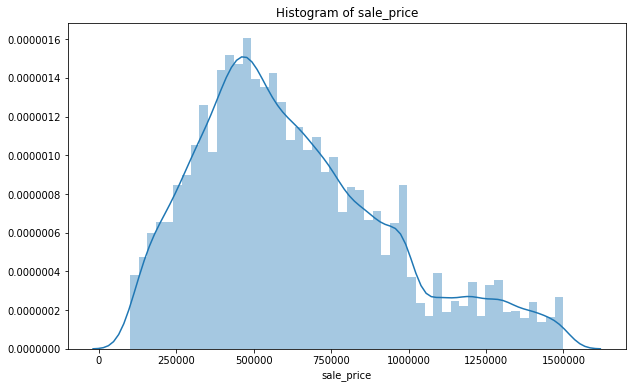

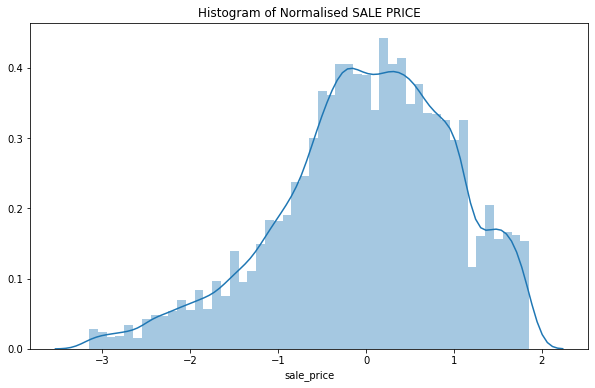

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:388: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklear

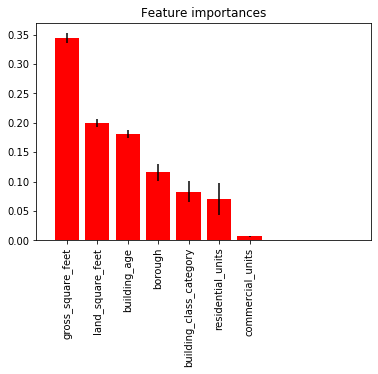

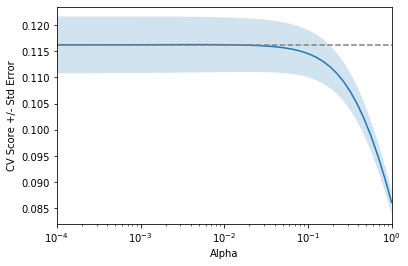

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import random 
import warnings
import operator
# warnings.filterwarnings("ignore")
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#------------------------------------------------------------------------
#------------------------DATA ADJASMENT----------------------------------
#------------------------------------------------------------------------

def removeBadColumns(df: pd.DataFrame) -> None:
    del df['Unnamed: 0']
    del df['SALE DATE']
    del df['APARTMENT NUMBER']
    del df['ADDRESS']
    del df['EASE-MENT']
    
    
def fixColumnNames(df: pd.DataFrame) -> None:
    df.columns = [column.lower().replace(' ', '_') for column in df.columns]

def setColumnTypes(df: pd.DataFrame) -> None:
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    # df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
    # df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
    # df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
    
    # Both TAX CLASS attributes should be categorical
    # df['BOROUGH'] = df['BOROUGH'].astype('category')
    # df['BOROUGH'] = df['BOROUGH'].astype('category')
    # df['BOROUGH'] = df['BOROUGH'].astype('category')
    # df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
    # df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

def splitBuildingClassColumn(df: pd.DataFrame, columnName: str, takeFirst = False) -> None:
    first = [cell[0] if len(cell) >= 1 else ''  for cell in df[columnName]]
    second = [cell[1] if len(cell) >= 2 else ''  for cell in df[columnName]]
    df[columnName + ' 0'] = first
    if not takeFirst:
        df[columnName + ' 1'] = second
    del df[columnName]

def splitBuildingClassColumns(df: pd.DataFrame) -> None:
    splitBuildingClassColumn(df, 'TAX CLASS AT PRESENT', takeFirst=True)
    splitBuildingClassColumn(df, 'BUILDING CLASS AT PRESENT')
    splitBuildingClassColumn(df, 'BUILDING CLASS AT TIME OF SALE')

def stripColumn(df: pd.DataFrame, columnName: str) -> None:
    df[columnName] = [cell.strip() for cell in df[columnName]]
    
def stripColumns(df: pd.DataFrame) -> pd.DataFrame:
    stripColumn(df, 'BUILDING CLASS CATEGORY')
    stripColumn(df, 'NEIGHBORHOOD')
    # stripColumn(df, 'TAX CLASS AT PRESENT 1')
    stripColumn(df, 'BUILDING CLASS AT PRESENT 0')
    stripColumn(df, 'BUILDING CLASS AT TIME OF SALE 0')
    
def categorizeColumn(df: pd.DataFrame, columnName: str) -> None:
    sortedCellValues = sorted(list(set(df[columnName])))
    
    m = {}
    if sortedCellValues[0] == '':
        m[''] = ''
        sortedCellValues = sortedCellValues[1:]

    for i, cellValue in enumerate(sortedCellValues):
        if cellValue == '':
            m[cellValue]: ''
        else:
            m[cellValue] = i
    df[columnName] = [m[column] for column in df[columnName]]
    df[columnName] = df[columnName].astype('category')

def categorizeColumns(df: pd.DataFrame) -> None:
    categorizeColumn(df, 'NEIGHBORHOOD')
    categorizeColumn(df, 'BUILDING CLASS CATEGORY')
    # categorizeColumn(df, 'TAX CLASS AT PRESENT 1')
    categorizeColumn(df, 'BUILDING CLASS AT PRESENT 0')
    categorizeColumn(df, 'BUILDING CLASS AT TIME OF SALE 0')
    
def removeRowsContainingNull(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        df = df[df[column].notnull()]
    return df

def removeRowsNotInRange(df: pd.DataFrame, columnName, startRange, endRange) -> pd.DataFrame:
    df = df[(df[columnName] >= startRange) & (df[columnName] <= endRange)]
    return df

def removeWrongTotalUnits(df: pd.DataFrame) -> None:
    df = df[df['total_units'] == df['commercial_units'] + df['residential_units']]
    
    
def AddingBuildingAgeColumn(df: pd.DataFrame) -> pd.DataFrame:
    temp_df = df[df['YEAR BUILT'] > 0]
    temp_df['BUILDING AGE'] = 2020 - temp_df['YEAR BUILT']
    return temp_df
    

#------------------------------------------------------------------------
#----------------------------GRAPHS--------------------------------------
#------------------------------------------------------------------------

def countNonNullData(df: pd.DataFrame) -> None:
    variables = df.columns

    count = []
    
    for variable in variables:
        length = df[variable].count()
        count.append(length)
        
    count_pct = np.round(100 * pd.Series(count) / len(df), 2)
    
    plt.figure(figsize=(10,6))
    plt.barh(variables, count_pct)
    plt.title('Count of available data in percent', fontsize=15)
    plt.show()

def boxplotOfData(df: pd.DataFrame, columnName: str) -> None:
    plt.figure(figsize=(15,6))
    
    sns.boxplot(x=columnName, data=df)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Boxplot of SALE PRICE in USD')
    plt.show()
    
def histogramGragh(df: pd.DataFrame, columnName: str) -> None:
    #Set the size of the plot
    plt.figure(figsize=(15,6))
    
    # Plot the data and configure the settings
    sns.distplot(df[columnName])
    plt.title('Histogram of SALE PRICE in USD')
    plt.ylabel('Normed Frequency')
    plt.show()

def correlationMatrix(df: pd.DataFrame) -> None:
        # Compute the correlation matrix
    d= df[['total_units','gross_square_feet','sale_price', 'building_age', 'land_square_feet', 'residential_units', 
             'commercial_units']]
    corr = d.corr()
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, 
                square=True, linewidths=.5, annot=True, cmap=cmap)
    plt.yticks(rotation=0)
    plt.title('Correlation Matrix of all Numerical Variables')
    plt.show()
   
#------------------------------------------------------------------------
#-----------------PREPARE & NORMALISE THE DATA---------------------------
#------------------------------------------------------------------------        
# def dataPreparation(df: pd.DataFrame) -> None:
#     #Choose only the variables I want to use in the model
#     columns = ['borough', 'building_class_category', 'commercial_units','gross_square_feet',
#            'sale_price', 'building_age', 'land_square_feet', 'residential_units']
#     data_model = df.loc[:,columns]
#     #Select the variables to be one-hot encoded
#     one_hot_features = ['borough', 'building_class_category']
#     
#     # For each categorical column, find the unique number of categories. This tells us how many columns we are adding to the dataset.
#     longest_str = max(one_hot_features, key=len)
#     total_num_unique_categorical = 0
#     for feature in one_hot_features:
#         num_unique = len(df[feature].unique())
#         print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
#                                                                               fill_col=len(longest_str),
#                                                                               num=num_unique))
#         total_num_unique_categorical += num_unique
#     print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))
#     data_model['sale_price'] = StandardScaler().fit_transform(np.log(data_model['sale_price']).values.reshape(-1,1))
# 
#     # Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
#     one_hot_encoded = pd.get_dummies(data_model[one_hot_features])
#     one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)
#     
#     #Delete the old columns...
#     data_model = data_model.drop(one_hot_features, axis=1)
#     
#     #...and add the new one-hot encoded variables
#     data_model = pd.concat([data_model, one_hot_encoded], axis=1)
#     print(data_model.head())
#     
#     #data_model['sale_price'] = [cell + 1 for cell in data_model['sale_price']]
# 
#     # Take the log and normalise
#     data_model['sale_price'] = StandardScaler().fit_transform(np.log(data_model['sale_price']).values.reshape(-1,1))



#------------------------------------------------------------------------
#----------------------------"MAIN"--------------------------------------
#------------------------------------------------------------------------

df = pd.read_csv('nyc-rolling-sales.csv')
removeBadColumns(df)

splitBuildingClassColumns(df)

stripColumns(df)

categorizeColumns(df)

df = AddingBuildingAgeColumn(df)

setColumnTypes(df)

boxplotOfData(df, 'SALE PRICE')

df = removeRowsNotInRange(df, 'SALE PRICE', startRange=100000, endRange=1500000)

fixColumnNames(df)

df = df.drop_duplicates(df.columns, keep='last')

countNonNullData(df)

df = removeRowsContainingNull(df)

countNonNullData(df)

removeWrongTotalUnits(df)
correlationMatrix(df)
# print(len(df))
# print(df.head())
# print(df.describe())
histogramGragh(df, 'sale_price')







#Choose only the variables I want to use in the model
columns = ['borough', 'building_class_category', 'commercial_units','gross_square_feet',
           'sale_price', 'building_age', 'land_square_feet', 'residential_units']
data_model = df.loc[:,columns]

#Select the variables to be one-hot encoded
one_hot_features = ['borough', 'building_class_category' ]

# For each categorical column, find the unique number of categories. This tells us how many columns we are adding to the dataset.
longest_str = max(one_hot_features, key=len)
total_num_unique_categorical = 0
for feature in one_hot_features:
    num_unique = len(df[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
                                                                          fill_col=len(longest_str),
                                                                          num=num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))


# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data_model[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

#Delete the old columns...
data_model = data_model.drop(one_hot_features, axis=1)

#...and add the new one-hot encoded variables
data_model = pd.concat([data_model, one_hot_encoded], axis=1)
data_model.head()

plt.figure(figsize=(10,6))
sns.distplot(data_model['sale_price'])
plt.title('Histogram of sale_price')
plt.show()

data_model['sale_price'] = StandardScaler().fit_transform(np.log(data_model['sale_price']).values.reshape(-1,1))

plt.figure(figsize=(10,6))
sns.distplot(data_model['sale_price'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

data_model.describe()

# Add 1 to Units
data_model['commercial_units'] = data_model['commercial_units'] + 1
data_model['residential_units'] = data_model['residential_units'] + 1

# Take the log and standardise
data_model['commercial_units'] = StandardScaler().fit_transform(np.log(data_model['commercial_units']).values.reshape(-1,1))
data_model['residential_units'] = StandardScaler().fit_transform(np.log(data_model['residential_units']).values.reshape(-1,1))

# Add 1 to Units
data_model['gross_square_feet'] = data_model['gross_square_feet'] + 1
data_model['land_square_feet'] = data_model['land_square_feet'] + 1

# Take the log and standardise
data_model['gross_square_feet'] = StandardScaler().fit_transform(np.log(data_model['gross_square_feet']).values.reshape(-1,1))
data_model['land_square_feet'] = StandardScaler().fit_transform(np.log(data_model['land_square_feet']).values.reshape(-1,1))


# Add 1 to BUILDING AGE
data_model['building_age'] = data_model['building_age'] + 1

# Take the log and standardise
data_model['building_age'] = StandardScaler().fit_transform(np.log(data_model['building_age']).values.reshape(-1,1))


#------------------------------------------------------------------------
#--------------------split to train & test-------------------------------
#------------------------------------------------------------------------

#Split data into training and testing set with 80% of the data going into training
training, testing = train_test_split(data_model, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data_model.shape[0],training.shape[0],testing.shape[0]))


#X are the variables/features that help predict y, which tells us whether an employee left or stayed. This is done for both 
#training and testing
df_train_s = training.loc[:,data_model.columns]
X_train_s = df_train_s.drop(['sale_price'], axis=1)
y_train_s = df_train_s.loc[:, ['sale_price']]

df_test_s = testing.loc[:,data_model.columns]
X_test_s = df_test_s.drop(['sale_price'], axis=1)
y_test_s = df_test_s.loc[:, ['sale_price']]


#------------------------------------------------------------------------
#----------------------Linear Regression---------------------------------
#------------------------------------------------------------------------

# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train_s, y_train_s)

# Predict the labels of the test set: y_pred
y_pred_s = linreg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train_s, y_train_s, cv=5)

print("R^2: {}".format(linreg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)


#------------------------------------------------------------------------
#------------------------Random Forest-----------------------------------
#------------------------------------------------------------------------

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train_s, y_train_s)

y_pred_s_rf = rf_reg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train_s, y_train_s, cv=5)


print("R^2: {}".format(rf_reg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

#------------------------------------------------------------------------
#---------------------Feature importances--------------------------------
#------------------------------------------------------------------------

#Feature Importance of Random Forest
importance = pd.DataFrame(list(zip(X_train_s.columns, np.transpose(rf_reg.feature_importances_))) \
            ).sort_values(1, ascending=False)
importance
#Feature importances graph

importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_s.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_s.shape[1]),X_train_s.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.show()


#------------------------------------------------------------------------
#-----------------------Ridge Regression---------------------------------
#------------------------------------------------------------------------

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
    
    
    
# Setup the array of alphas and lists to store scores

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train_s, y_train_s, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)



# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.01, normalize=True)

#Fit the model
ridge.fit(X_train_s, y_train_s)

#Predict
y_pred_s_ridge = ridge.predict(X_test_s)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train_s, y_train_s, cv=5)


print("R^2: {}".format(ridge.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_ridge))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)


#------------------------------------------------------------------------
#-------------------ElasticNet and GridSearch----------------------------
#------------------------------------------------------------------------

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train_s, y_train_s)

# Predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test_s)
r2 = gm_cv.score(X_test_s, y_test_s)
mse = mean_squared_error(y_test_s, y_pred_elas)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))




# sorted(list(set(df['building_class_category'])))

